In [2]:
!git clone https://github.com/pondelion/FinAppModel.git

Cloning into 'FinAppModel'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 309 (delta 122), reused 264 (delta 83), pack-reused 0
Receiving objects: 100% (309/309), 64.45 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [3]:
ls

FinAppModel/  sample_data/


In [4]:
%cd FinAppModel/

/content/FinAppModel


In [5]:
!chmod u+x extra_install.sh

In [ ]:
!sudo ./extra_install.sh

In [ ]:
!pip install cython
!pip install pandas
!pip install overrides
!pip install scikit-learn
!pip install torch
!pip install pytest
!pip install optuna
!pip install lightgbm
!pip install catboost
!pip install boto3
!pip install fsspec
!pip install s3fs

In [8]:
!pip install Ta-Lib

     |████████████████████████████████| 276kB 4.3MB/s 
  Created wheel for Ta-Lib: filename=TA_Lib-0.4.19-cp36-cp36m-linux_x86_64.whl size=1437789 sha256=d6642ef83775e9e914c4521e0730e8ad2b9ad5227eac94f1197ebf9fff370ad5
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built Ta-Lib


In [9]:
!pip install -e .

Obtaining file:///content/FinAppModel
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Running setup.py develop for fin-app-model


-> restart kernel

In [1]:
%cd /content/FinAppModel/

/content/FinAppModel


In [2]:
!python -m pytest tests -s

============================= test session starts ==============================
platform linux -- Python 3.6.9, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content/FinAppModel, inifile:
plugins: typeguard-2.7.1
collecting 3 items                                                             /usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!

collected 7 items                                                              

tests/test_feature.py             ohlc_testdata_close  ...  ohlc_testdata_month
2015-04-04            -3.146106  ...                    4
2015-04-08            -4.889113  ...                    4
2015-04-09            -4.085650  ...                    4
2015-04-10            -4.572391  ...                    4
2015-04-11            -3.476555  ...                    4
...                         ...  ...                  ...
2020-01-23            21.028855 

In [6]:
from fin_app_models.model.structured_base.regression import (
    LinearRegression,
    RidgeRegression,
    LassoRegression,
)
from fin_app_models.model.structured_base.timeseries_model import (
    TrendLinearRegression,
)

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!



In [7]:
from fin_app_models.dataset.stock import Stock

In [8]:
Stock(code=4719).data

INFO : 2021-02-23 07:09:36,334 : [CSVCachedData] Downloading s3://fin-app/stockprice_concat/stooq/4719.csv to /var/tmp/stock/4719.csv


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-17,3485.00,3575.00,3485.00,3555.00,12100
2020-12-16,3490.00,3505.00,3465.00,3495.00,4900
2020-12-15,3525.00,3525.00,3445.00,3490.00,10400
2020-12-14,3570.00,3585.00,3500.00,3500.00,6400
2020-12-11,3575.00,3575.00,3535.00,3570.00,8700
...,...,...,...,...,...
2005-03-28,1536.40,1582.08,1536.40,1582.08,10770
2005-03-25,1548.58,1574.45,1533.33,1574.45,20359
2005-03-24,1548.58,1578.27,1540.97,1552.37,16814


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random

In [10]:
sns.set()

In [11]:
stock_files = glob.glob('/content/drive/MyDrive/data/stockprice/stooq/*.csv')

In [12]:
stock_files[:10]

['/content/drive/MyDrive/data/stockprice/stooq/8889.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8890.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8891.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8892.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8893.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8894.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8897.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8898.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8903.csv',
 '/content/drive/MyDrive/data/stockprice/stooq/8904.csv']

In [183]:
np.random.seed(seed=44)

In [184]:
rand_stocks = np.random.choice(stock_files, 20)

In [185]:
rand_stocks

array(['/content/drive/MyDrive/data/stockprice/stooq/6769.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/2317.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/2914.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/7434.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/7953.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/5486.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/9042.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/3202.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/2910.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/3401.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/9104.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/1380.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/9701.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/3245.csv',
       '/content/drive/MyDrive/data/stockprice/stooq/2424.csv',
       '/content/drive/MyDrive/data/stoc

In [186]:
df_dict = {filepath.split('/')[-1].replace('.csv', ''): pd.read_csv(filepath, index_col='Date', parse_dates=True).sort_index() for filepath in rand_stocks}

In [187]:
df_dict['6769']

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-30,1370.36,1419.30,1321.42,1370.36,232728
2007-07-31,1389.93,1438.87,1360.58,1389.93,85306
2007-08-01,1370.36,1370.36,1340.99,1370.36,22578
2007-08-02,1370.36,1389.93,1282.27,1389.93,48119
2007-08-03,1389.93,1468.24,1389.93,1429.09,43215
...,...,...,...,...,...
2020-12-15,719.00,721.00,710.00,721.00,10200
2020-12-16,719.00,725.00,708.00,716.00,49300
2020-12-17,718.00,735.00,712.00,722.00,48700


In [188]:
from fin_app_models.feature.creation.ohlc import create_ohlc_features
from fin_app_models.feature.creation.single_ts import create_single_ts_features
from fin_app_models.feature.selection.random_selection import random_feat_select

In [189]:
df_feats = random_feat_select(
    df_dict, {},
    close_col_name='Close',
    open_col_name='Open',
    high_col_name='High',
    low_col_name='Low',
)

['3632_kurt_14', '3395_weekday', '2910_atr', '2914_momentum_1_10', '2910_low', '9042_ppo_12_26', '5486_close', '7434_bb60_high', '2910_bb7_high', '6769_bb30_std', '9104_min_14', '9104_atr', '5486_momentum_1_30', '7434_year', '6769_low', '3395_return_lag30', '7434_bb30_mid', '2914_median_14', '6028_bb60_std', '2914_return_lag10', '3202_month', '3395_bb30_low', '6028_momentum_1_10', '7434_close', '2910_macd', '9042_kurt_14', '3395_skew_14', '1380_kurt_14', '7434_return_lag30', '2910_high', '2424_bb7_low', '6028_cmo_14', '1380_median_14', '3202_min_14', '2914_bb7_high', '3632_momentum_1_30', '1380_year', '2914_kurt_14', '5486_ppo_12_26', '9104_year', '2910_median_14', '1380_bb60_std', '2424_close', '3202_momentum_1_3', '2424_return_lag3', '3632_ppo_12_26', '9042_return_lag7', '3632_skew_14', '7434_open', '9042_bb30_std', '6028_return_lag30', '5486_atr', '6028_weekday', '5486_kurt_14', '7434_low', '2910_open', '3632_macd', '9104_return_lag10', '2914_ppo_12_26', '7434_min_14', '2424_high', 

In [190]:
df_feats

,3632_kurt_14,3395_weekday,2910_atr,2914_momentum_1_10,2910_low,9042_ppo_12_26,5486_close,7434_bb60_high,2910_bb7_high,6769_bb30_std,9104_min_14,9104_atr,5486_momentum_1_30,7434_year,6769_low,3395_return_lag30,7434_bb30_mid,2914_median_14,6028_bb60_std,2914_return_lag10,3202_month,3395_bb30_low,6028_momentum_1_10,7434_close,2910_macd,9042_kurt_14,3395_skew_14,1380_kurt_14,7434_return_lag30,2910_high,2424_bb7_low,6028_cmo_14,1380_median_14,3202_min_14,2914_bb7_high,3632_momentum_1_30,1380_year,2914_kurt_14,5486_ppo_12_26,9104_year,...,9042_return_lag10,2914_weekday,2914_bb60_std,2910_close,3395_natr,2424_momentum_1_60,3632_weekday,2914_momentum_1_60,3632_month,7434_bb7_std,2910_return_lag10,3632_bb60_high,7434_bb60_low,9042_momentum_1_20,5486_apo_12_26,9104_bb7_low,5486_low,6028_month,2910_bb30_mid,7434_apo_12_26,2910_cmo_14,3632_bb60_std,5486_skew_14,3395_momentum_1_7,2424_return_lag1,2424_momentum_1_10,3395_open,3202_max_14,3395_return_lag20,2910_bb20_low,6028_open,6028_bb60_mid,6028_momentum_1_30,1380_cmo_14,7434_momentum_1_20,9042_return_lag1,1380_return_lag60,2910_return_lag1,9042_weekday,9042_bb60_mid
2016-03-11,0.915433,4,0.341399,0.020031,1512.02,0.476176,1120.57,1796.576743,1537.867290,154.646909,1942.09,0.053967,-0.009282,2016,1085.52,-0.000594,1713.522333,3707.915,433.469061,0.001235,3,2409.192033,0.017337,1671.69,2.020602,-1.480840,-0.451951,-1.461184,-0.001130,1534.91,NaN,-10.760016,543.420,56.0,3852.065497,0.048294,2016,-0.289282,3.420763,2016,...,-0.005894,4,359.566434,1514.32,28.508951,NaN,4,0.020064,3,75.490800,0.009563,578.823263,1630.915924,0.004249,37.677179,2209.102014,1080.62,3,1398.839333,-7.206474,32.804095,58.301430,0.352809,-0.008245,-0.075031,NaN,2709.30,60.0,0.007010,1283.127574,2838.80,3068.311833,0.017170,8.006329,-0.010872,-0.001403,0.001590,0.000000,4,3538.252667
2016-03-24,-0.853813,3,0.914083,-0.008023,1592.20,-1.730558,1053.35,1795.315198,1616.355842,218.385035,2119.53,-0.006110,0.020768,2016,1326.31,0.003506,1712.241000,3688.675,369.118315,0.000065,3,2435.479307,0.002821,1690.91,3.048903,1.365121,-0.336280,-0.837837,-0.000749,1603.65,685.654191,15.695302,555.280,59.0,3704.291884,-0.008836,2016,0.170569,-0.244131,2016,...,0.002276,3,365.604353,1596.78,24.797200,NaN,3,-0.007346,3,32.980036,0.006543,578.245878,1630.255802,-0.015625,-2.720128,2112.329675,1052.46,3,1443.849667,-11.172179,41.139000,57.866545,0.380663,-0.002725,0.038334,-0.064574,2831.23,61.0,0.004788,1328.498615,3045.34,3021.157500,-0.001113,14.019869,-0.011781,0.015695,0.001657,0.001430,3,3490.403500
2016-03-29,-0.461149,1,1.173923,-0.005182,1621.98,-1.303457,1097.19,1794.007632,1668.781459,358.702055,2119.53,-0.046664,-0.017687,2016,1473.14,0.003891,1710.959667,3688.675,347.283772,0.003520,3,2487.358969,-0.009932,1690.91,3.340845,0.119618,-0.963103,-0.291997,-0.000749,1679.24,721.573941,18.734487,559.235,59.0,3818.487463,-0.016646,2016,-0.154830,-1.575349,2016,...,0.002436,1,376.059951,1660.92,23.555134,NaN,1,-0.007444,3,38.448917,0.008222,583.201288,1629.641701,0.003751,-17.539615,2105.188880,1088.02,3,1476.868333,-15.137885,53.285003,61.237288,0.158926,0.016596,0.007920,-0.017619,2896.96,61.0,0.004354,1380.173544,3011.87,3009.843167,-0.013643,-12.689496,-0.000984,-0.003441,0.001340,0.013986,1,3477.384333
2016-04-01,-0.726168,4,1.462129,0.011803,1521.16,-1.062844,1039.35,1793.409809,1703.180856,394.172375,2095.33,-0.102111,0.022793,2016,1376.23,0.002040,1709.678333,3689.875,326.800175,0.002421,4,2541.740114,-0.008786,1690.91,2.510799,-0.781288,-0.722216,-0.077179,-0.000749,1569.30,674.375787,31.868896,563.190,59.0,3847.621799,0.037687,2016,-0.518972,-2.969293,2016,...,0.000769,4,382.026439,1523.45,23.524446,NaN,4,0.010884,4,39.010665,-0.004260,590.326631,1628.958191,0.028019,-32.974808,2062.984271,1036.59,4,1498.571000,-19.103590,-1.991776,66.366465,0.557200,0.027636,-0.045912,0.031646,2833.08,61.0,-0.000556,1445.375353,3255.68,3003.548500,-0.012666,-1.602818,-0.000984,-0.030637,0.001292,-0.029217,4,3461.878500
2016-04-05,-0.656

In [191]:
df_feats.columns.tolist()

['3632_kurt_14',
 '3395_weekday',
 '2910_atr',
 '2914_momentum_1_10',
 '2910_low',
 '9042_ppo_12_26',
 '5486_close',
 '7434_bb60_high',
 '2910_bb7_high',
 '6769_bb30_std',
 '9104_min_14',
 '9104_atr',
 '5486_momentum_1_30',
 '7434_year',
 '6769_low',
 '3395_return_lag30',
 '7434_bb30_mid',
 '2914_median_14',
 '6028_bb60_std',
 '2914_return_lag10',
 '3202_month',
 '3395_bb30_low',
 '6028_momentum_1_10',
 '7434_close',
 '2910_macd',
 '9042_kurt_14',
 '3395_skew_14',
 '1380_kurt_14',
 '7434_return_lag30',
 '2910_high',
 '2424_bb7_low',
 '6028_cmo_14',
 '1380_median_14',
 '3202_min_14',
 '2914_bb7_high',
 '3632_momentum_1_30',
 '1380_year',
 '2914_kurt_14',
 '5486_ppo_12_26',
 '9104_year',
 '2910_median_14',
 '1380_bb60_std',
 '2424_close',
 '3202_momentum_1_3',
 '2424_return_lag3',
 '3632_ppo_12_26',
 '9042_return_lag7',
 '3632_skew_14',
 '7434_open',
 '9042_bb30_std',
 '6028_return_lag30',
 '5486_atr',
 '6028_weekday',
 '5486_kurt_14',
 '7434_low',
 '2910_open',
 '3632_macd',
 '9104_retu

In [192]:
df_feats.dropna()

,3632_kurt_14,3395_weekday,2910_atr,2914_momentum_1_10,2910_low,9042_ppo_12_26,5486_close,7434_bb60_high,2910_bb7_high,6769_bb30_std,9104_min_14,9104_atr,5486_momentum_1_30,7434_year,6769_low,3395_return_lag30,7434_bb30_mid,2914_median_14,6028_bb60_std,2914_return_lag10,3202_month,3395_bb30_low,6028_momentum_1_10,7434_close,2910_macd,9042_kurt_14,3395_skew_14,1380_kurt_14,7434_return_lag30,2910_high,2424_bb7_low,6028_cmo_14,1380_median_14,3202_min_14,2914_bb7_high,3632_momentum_1_30,1380_year,2914_kurt_14,5486_ppo_12_26,9104_year,...,9042_return_lag10,2914_weekday,2914_bb60_std,2910_close,3395_natr,2424_momentum_1_60,3632_weekday,2914_momentum_1_60,3632_month,7434_bb7_std,2910_return_lag10,3632_bb60_high,7434_bb60_low,9042_momentum_1_20,5486_apo_12_26,9104_bb7_low,5486_low,6028_month,2910_bb30_mid,7434_apo_12_26,2910_cmo_14,3632_bb60_std,5486_skew_14,3395_momentum_1_7,2424_return_lag1,2424_momentum_1_10,3395_open,3202_max_14,3395_return_lag20,2910_bb20_low,6028_open,6028_bb60_mid,6028_momentum_1_30,1380_cmo_14,7434_momentum_1_20,9042_return_lag1,1380_return_lag60,2910_return_lag1,9042_weekday,9042_bb60_mid
2016-06-29,0.666047,2,0.596961,0.005449,1436.09,-1.242981,948.45,1785.013072,1497.646871,248.140669,1926.17,-0.536789,-0.039945,2016,1077.69,-0.001958,1698.888333,3371.605,216.807056,0.002071,6,2647.795162,-0.020431,1710.13,-1.951012,0.735177,0.246529,-0.678086,-0.000886,1484.12,515.329210,1.236603,513.780,60.0,3509.548256,-0.023605,2016,0.849229,-4.030695,2016,...,0.001467,2,324.715463,1450.88,16.927256,-0.025681,2,0.001248,6,47.641009,-0.001138,643.646602,1641.136261,-0.016458,-41.843141,1845.881967,927.33,6,1513.522333,5.007692,-8.454691,55.438602,-0.298560,-0.032788,0.020744,-0.037986,2723.60,67.0,-0.003471,1335.377938,3155.28,3073.760833,-0.019764,3.449755,0.000565,0.016129,0.000575,-0.003174,2,3468.733167
2016-07-20,-0.116649,2,0.758807,-0.003191,1463.81,2.082054,1051.29,1782.246367,1523.475277,255.306300,1898.06,-0.500944,-0.000019,2016,920.10,-0.000210,1700.169667,3501.080,196.844173,-0.002009,7,2654.903488,0.002487,1710.13,-0.143069,-0.719465,-0.656532,1.984818,0.001299,1485.05,536.366036,19.666262,517.730,62.0,3594.147084,0.006315,2016,0.846022,-1.465191,2016,...,0.003352,2,271.263216,1474.90,15.769250,-0.007097,2,-0.002879,7,13.451198,0.003056,649.967049,1641.885967,-0.005188,-14.301218,1992.801661,1031.99,7,1465.002667,-9.898590,0.032093,72.406882,0.343923,0.018109,0.004759,-0.006852,2915.20,65.0,0.001931,1370.037598,3298.71,3121.903500,0.000096,-0.728507,0.000000,0.007656,-0.001338,-0.002482,2,3553.534500
2016-07-25,-2.079295,0,0.762273,0.012684,1413.02,1.932993,1117.40,1780.302953,1529.278500,210.465493,1898.06,-0.505251,-0.036064,2016,946.53,-0.000742,1706.351667,3490.910,197.255573,-0.002643,7,2655.830803,-0.023718,1711.10,-0.529816,-0.029708,-0.564125,1.970439,0.001163,1445.34,533.948508,11.906097,518.225,62.0,3539.463150,-0.015726,2016,-0.824724,1.790283,2016,...,0.002355,0,241.338557,1414.87,15.886322,0.026237,0,0.013594,7,0.960051,-0.000258,648.847252,1641.493047,0.009686,17.679808,2039.730494,1092.59,7,1449.826000,-9.904038,-15.907531,78.733918,-0.017595,0.003889,-0.028724,0.030063,2819.40,69.0,0.003605,1387.827750,3255.68,3131.864333,-0.027037,2.902062,-0.000530,-0.005149,0.000126,-0.014152,0,3567.135000
2016-07-26,-2.042999,1,0.762419,0.008214,1401.92,1.801282,1092.59,1779.832419,1509.161111,188.577630,1898.06,-0.509809,0.023840,2016,925.97,-0.001678,1707.665333,3483.175,199.783672,-0.004471,7,2651.110459,0.000757,1711.10,-0.711455,0.743440,-0.536414,0.675615,0.000777,1428.72,534.467883,12.474380,519.215,62.0,3504.454422,-0.012726,2016,-0.145419,3.255170,2016,...,-0.000258,1,237.374722,1406.54,16.407061,0.006777,1,0.010992,7,0.960051,-0.004422,648.437334,1641.355248,0.003669,32.223205,1969.140394,1076.07,7,1445.393000,-5.395577,-17.995150,80.526334,-0.309701,0.027300,-0.009852,0.007966,2805.71,69.0,0.000959,1385.893414,3270.03,3135.609333,-0.001262,15.951635,-0.000530,-0.001281,0.000774,-0.005887,1,357

In [193]:
df_feats.dropna(inplace=True)

In [194]:
corrs = df_feats.dropna().corr()

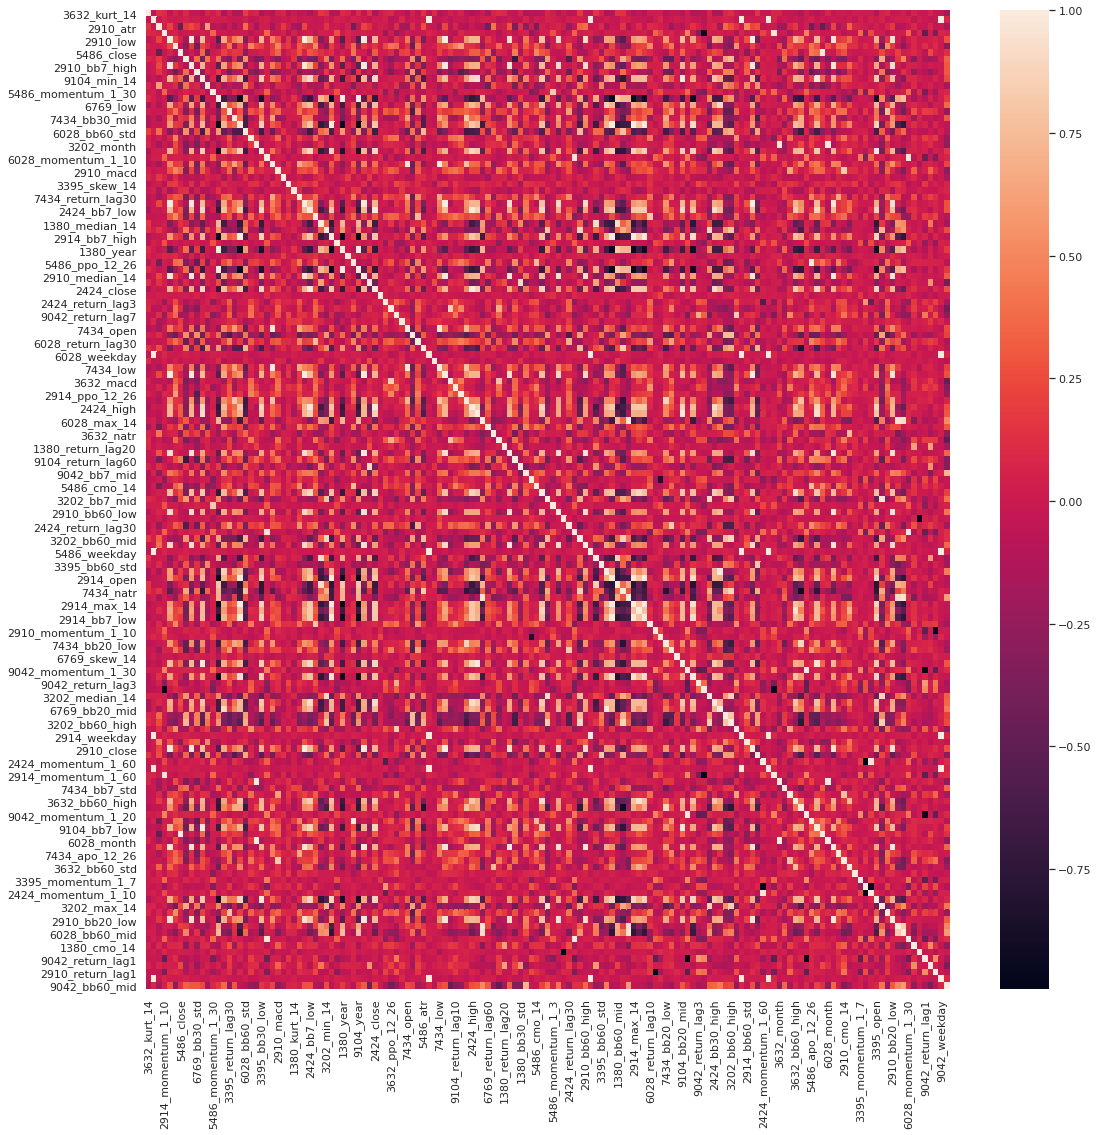

In [195]:
plt.figure(figsize=(18, 18))
sns.heatmap(corrs)

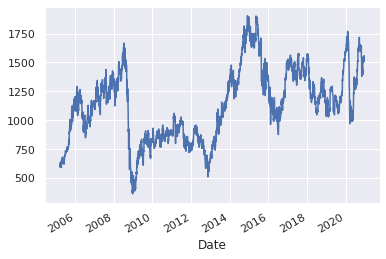

In [199]:
df_dict['5486'].Close.plot()

In [200]:
from typing import Union

import pandas as pd


def return_days(ts: Union[pd.Series, pd.DataFrame], days: int = 1):
    return (ts.shift(-days) - ts) / ts


In [201]:
TARGET_CODE = '5486'

In [202]:
sr_target = return_days(df_dict[TARGET_CODE].Close, days=3).rename('ret3d')

In [203]:
sr_target

Date
2005-03-22   -0.040325
2005-03-23   -0.014830
2005-03-24   -0.013591
2005-03-25   -0.002988
2005-03-28    0.016544
                ...   
2020-12-11   -0.014112
2020-12-14   -0.020552
2020-12-15         NaN
2020-12-16         NaN
2020-12-17         NaN
Name: ret3d, Length: 3854, dtype: float64

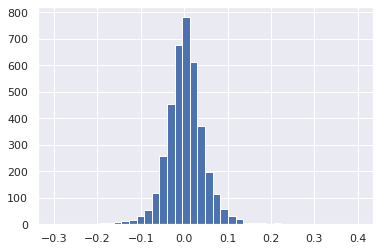

In [204]:
sr_target.hist(bins=40)

In [205]:
sr_target.dropna(inplace=True)

In [206]:
df_merged = pd.merge(df_feats, sr_target, left_index=True, right_index=True).dropna()
df_merged

,3632_kurt_14,3395_weekday,2910_atr,2914_momentum_1_10,2910_low,9042_ppo_12_26,5486_close,7434_bb60_high,2910_bb7_high,6769_bb30_std,9104_min_14,9104_atr,5486_momentum_1_30,7434_year,6769_low,3395_return_lag30,7434_bb30_mid,2914_median_14,6028_bb60_std,2914_return_lag10,3202_month,3395_bb30_low,6028_momentum_1_10,7434_close,2910_macd,9042_kurt_14,3395_skew_14,1380_kurt_14,7434_return_lag30,2910_high,2424_bb7_low,6028_cmo_14,1380_median_14,3202_min_14,2914_bb7_high,3632_momentum_1_30,1380_year,2914_kurt_14,5486_ppo_12_26,9104_year,...,2914_weekday,2914_bb60_std,2910_close,3395_natr,2424_momentum_1_60,3632_weekday,2914_momentum_1_60,3632_month,7434_bb7_std,2910_return_lag10,3632_bb60_high,7434_bb60_low,9042_momentum_1_20,5486_apo_12_26,9104_bb7_low,5486_low,6028_month,2910_bb30_mid,7434_apo_12_26,2910_cmo_14,3632_bb60_std,5486_skew_14,3395_momentum_1_7,2424_return_lag1,2424_momentum_1_10,3395_open,3202_max_14,3395_return_lag20,2910_bb20_low,6028_open,6028_bb60_mid,6028_momentum_1_30,1380_cmo_14,7434_momentum_1_20,9042_return_lag1,1380_return_lag60,2910_return_lag1,9042_weekday,9042_bb60_mid,ret3d
2016-06-29,0.666047,2,0.596961,0.005449,1436.09,-1.242981,948.45,1785.013072,1497.646871,248.140669,1926.17,-0.536789,-0.039945,2016,1077.69,-0.001958,1698.888333,3371.605,216.807056,0.002071,6,2647.795162,-0.020431,1710.13,-1.951012,0.735177,0.246529,-0.678086,-0.000886,1484.12,515.329210,1.236603,513.780,60.0,3509.548256,-0.023605,2016,0.849229,-4.030695,2016,...,2,324.715463,1450.88,16.927256,-0.025681,2,0.001248,6,47.641009,-0.001138,643.646602,1641.136261,-0.016458,-41.843141,1845.881967,927.33,6,1513.522333,5.007692,-8.454691,55.438602,-0.298560,-0.032788,0.020744,-0.037986,2723.60,67.0,-0.003471,1335.377938,3155.28,3073.760833,-0.019764,3.449755,0.000565,0.016129,0.000575,-0.003174,2,3468.733167,-0.008698
2016-07-20,-0.116649,2,0.758807,-0.003191,1463.81,2.082054,1051.29,1782.246367,1523.475277,255.306300,1898.06,-0.500944,-0.000019,2016,920.10,-0.000210,1700.169667,3501.080,196.844173,-0.002009,7,2654.903488,0.002487,1710.13,-0.143069,-0.719465,-0.656532,1.984818,0.001299,1485.05,536.366036,19.666262,517.730,62.0,3594.147084,0.006315,2016,0.846022,-1.465191,2016,...,2,271.263216,1474.90,15.769250,-0.007097,2,-0.002879,7,13.451198,0.003056,649.967049,1641.885967,-0.005188,-14.301218,1992.801661,1031.99,7,1465.002667,-9.898590,0.032093,72.406882,0.343923,0.018109,0.004759,-0.006852,2915.20,65.0,0.001931,1370.037598,3298.71,3121.903500,0.000096,-0.728507,0.000000,0.007656,-0.001338,-0.002482,2,3553.534500,0.062885
2016-07-25,-2.079295,0,0.762273,0.012684,1413.02,1.932993,1117.40,1780.302953,1529.278500,210.465493,1898.06,-0.505251,-0.036064,2016,946.53,-0.000742,1706.351667,3490.910,197.255573,-0.002643,7,2655.830803,-0.023718,1711.10,-0.529816,-0.029708,-0.564125,1.970439,0.001163,1445.34,533.948508,11.906097,518.225,62.0,3539.463150,-0.015726,2016,-0.824724,1.790283,2016,...,0,241.338557,1414.87,15.886322,0.026237,0,0.013594,7,0.960051,-0.000258,648.847252,1641.493047,0.009686,17.679808,2039.730494,1092.59,7,1449.826000,-9.904038,-15.907531,78.733918,-0.017595,0.003889,-0.028724,0.030063,2819.40,69.0,0.003605,1387.827750,3255.68,3131.864333,-0.027037,2.902062,-0.000530,-0.005149,0.000126,-0.014152,0,3567.135000,-0.023850
2016-07-26,-2.042999,1,0.762419,0.008214,1401.92,1.801282,1092.59,1779.832419,1509.161111,188.577630,1898.06,-0.509809,0.023840,2016,925.97,-0.001678,1707.665333,3483.175,199.783672,-0.004471,7,2651.110459,0.000757,1711.10,-0.711455,0.743440,-0.536414,0.675615,0.000777,1428.72,534.467883,12.474380,519.215,62.0,3504.454422,-0.012726,2016,-0.145419,3.255170,2016,...,1,237.374722,1406.54,16.407061,0.006777,1,0.010992,7,0.960051,-0.004422,648.437334,1641.355248,0.003669,32.223205,1969.140394,1076.07,7,1445.393000,-5.395577,-17.995150,80.526334,-0.309701,0.027300,-0.009852,0.007966,2805.71,69.0,0.000959,1385.893414,3270.03,3135.609333,-0.001262,15.951635,-0.000530,-0.001281,0.000774,-0.005887,1,3570.895500,-0.031082
2

In [207]:
df_feats = df_merged[df_feats.columns]
sr_target = df_merged['ret3d']

In [208]:
df_train_feats = df_feats[df_feats.index <= '2020-01-01']
df_test_feats = df_feats[df_feats.index > '2020-01-01']
sr_train_target = sr_target[sr_target.index <= '2020-01-01']
sr_test_target = sr_target[sr_target.index > '2020-01-01']

In [209]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

def create_y_feat_train_dataset(df_train_X, sr_train_y, seq_len):
    xs = []
    ys = []
    for t in range(len(df_train_X)-seq_len):
        mms_x = MinMaxScaler((-0.5, 0.5))
        mms_y = MinMaxScaler((-0.5, 0.5))
        x = mms_x.fit_transform(df_train_X.iloc[t:t+seq_len, :].to_numpy().reshape(-1, len(df_train_X.columns))).reshape(seq_len, len(df_train_X.columns))
        y = mms_y.fit_transform(sr_train_y.iloc[t:t+seq_len].to_numpy().reshape(-1, 1)).flatten()
        xs.append(torch.Tensor(x).view(seq_len, len(df_train_X.columns)))
        ys.append(torch.Tensor(y).view(seq_len, 1))
    return torch.stack(xs, dim=0), torch.stack(ys, dim=0)

In [210]:
xs_train, ys_train = create_y_feat_train_dataset(df_train_feats, sr_train_target, 30)

In [211]:
xs_train.shape

torch.Size([306, 30, 149])

In [212]:
ys_train.shape

torch.Size([306, 30, 1])

In [213]:
class BILSTM(nn.Module):

    def __init__(
        self,
        input_dim: int,
        hidden_dim: int,
        output_dim: int,
        num_layers: int
    ):
        super(BILSTM, self).__init__()
        self._input_dim = input_dim
        self._hidden_dim = hidden_dim
        self._num_layers = num_layers
        self._output_dim = output_dim

        self._lstm = nn.LSTM(
            input_size=self._input_dim,
            hidden_size=self._hidden_dim,
            num_layers=self._num_layers,
            batch_first=True,
            bidirectional=True
        )

        self._linear = nn.Linear(
            self._hidden_dim*2,
            self._output_dim
        )

    def forward(self, x):
        self._lstm.flatten_parameters()
        out, hidden = self._lstm(x)
        return self._linear(out[:, :, :])

In [214]:
model = BILSTM(
    input_dim=len(df_feats.columns),
    hidden_dim=32,
    num_layers=2,
    output_dim=1
)

In [215]:
mse_loss = nn.MSELoss()
optim = torch.optim.Adam(
    params=model.parameters(),
    lr=0.005
)

In [216]:
BATCH_SIZE =16
EPOCHS = 100

In [217]:
from fastprogress import progress_bar as pb

In [218]:
loss_history = []

for n in pb(range(EPOCHS)):
    losses = []
    for t in range(xs_train.size(0) // BATCH_SIZE):
        x = xs_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]
        y = ys_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]

        out = model(x)
        loss = mse_loss(out, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

    loss_history.append(sum(losses) / len(losses))

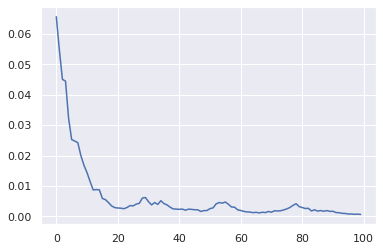

In [219]:
plt.plot(loss_history)

In [220]:
model.eval()

BILSTM(
  (_lstm): LSTM(149, 32, num_layers=2, batch_first=True, bidirectional=True)
  (_linear): Linear(in_features=64, out_features=1, bias=True)
)

In [221]:
model(xs_train).shape

torch.Size([306, 30, 1])

In [222]:
preds = model(xs_train)[:, -1, :].detach().numpy().flatten()

In [223]:
preds.shape

(306,)

In [224]:
ys_train[:, -1, :].detach().numpy().flatten().shape

(306,)

In [225]:
df_train_preds = pd.DataFrame({
    'actual': ys_train[:, -1, :].detach().numpy().flatten(),
    'pred': preds
})

In [226]:
df_train_preds

,actual,pred
0,-0.020997,0.019247
1,0.164489,0.124824
2,-0.212312,-0.127378
3,0.050355,0.085419
4,0.065523,0.021628
...,...,...
301,-0.233665,-0.230116
302,-0.252741,-0.280811
303,-0.411109,-0.366504
304,-0.270853,-0.252859


<Figure size 1296x576 with 0 Axes>

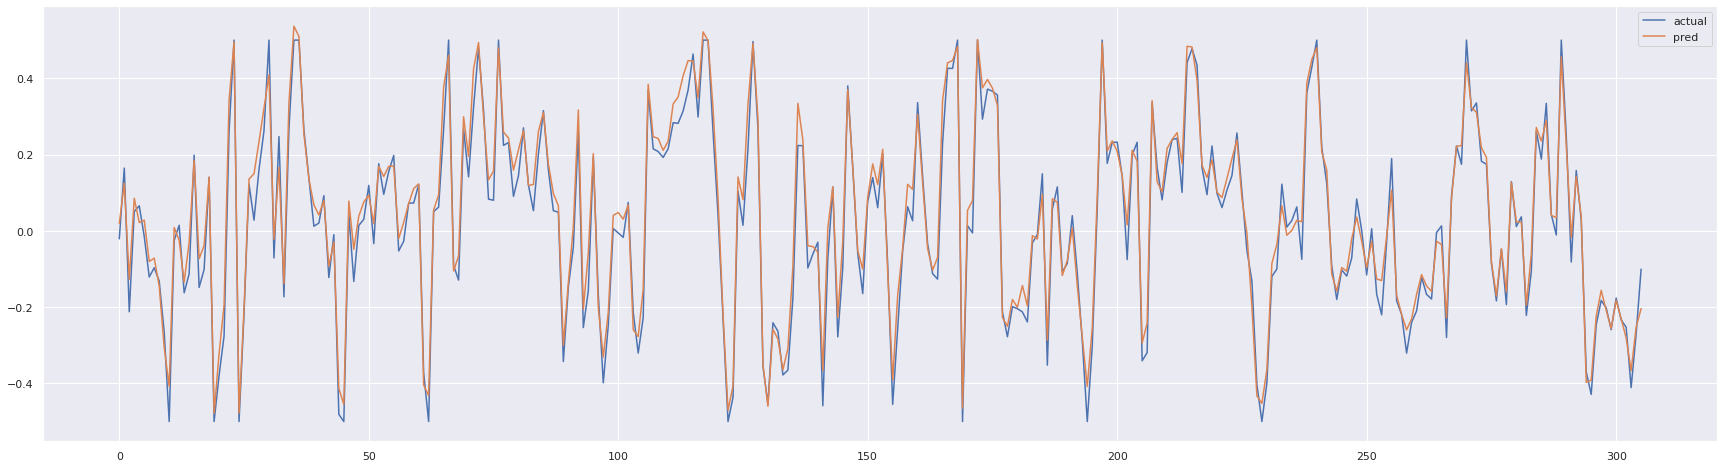

In [227]:
plt.figure(figsize=(18, 8))
df_train_preds.plot(figsize=(30, 8))

In [228]:
train_pct_err = (df_train_preds['actual'] - df_train_preds['pred']) / df_train_preds['actual']

In [229]:
train_pct_err

0      1.916648
1      0.241141
2      0.400044
3     -0.696349
4      0.669923
         ...   
301    0.015188
302   -0.111065
303    0.108500
304    0.066436
305   -1.028804
Length: 306, dtype: float32

(-4.0, 4.0)

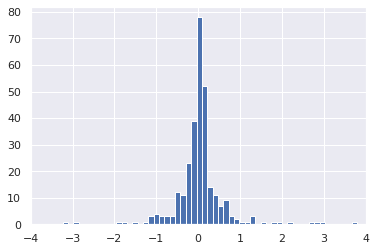

In [230]:
train_pct_err.hist(bins=400)
plt.xlim(-4, 4)

In [231]:
train_pct_err.abs().mean()

0.6824225187301636

In [232]:
train_pct_err.abs().median()

0.1688762605190277

In [233]:
(df_train_preds['actual'] * df_train_preds['pred']) > 0 

0      False
1       True
2       True
3       True
4       True
       ...  
301     True
302     True
303     True
304     True
305     True
Length: 306, dtype: bool

In [234]:
# bininary classification train accuracy 
((df_train_preds['actual'] * df_train_preds['pred']) > 0 ).sum() / len(df_train_preds['actual'])

0.9411764705882353

In [235]:
xs_test, ys_test = create_y_feat_train_dataset(df_test_feats, sr_test_target, 30)

In [236]:
xs_test.shape

torch.Size([100, 30, 149])

In [237]:
preds = model(xs_test)[:, -1, :].detach().numpy().flatten()

In [238]:
preds.shape

(100,)

In [239]:
ys_test.shape

torch.Size([100, 30, 1])

In [240]:
df_test_preds = pd.DataFrame({
    'actual': ys_test[:, -1, :].detach().numpy().flatten(),
    'pred': preds
})

In [241]:
df_test_preds

,actual,pred
0,-0.498557,0.369813
1,-0.500000,0.337897
2,-0.482157,0.314490
3,-0.285314,0.343261
4,-0.194782,0.458728
...,...,...
95,0.117003,0.057501
96,0.171111,-0.134131
97,0.245238,-0.047775
98,0.359497,0.073964


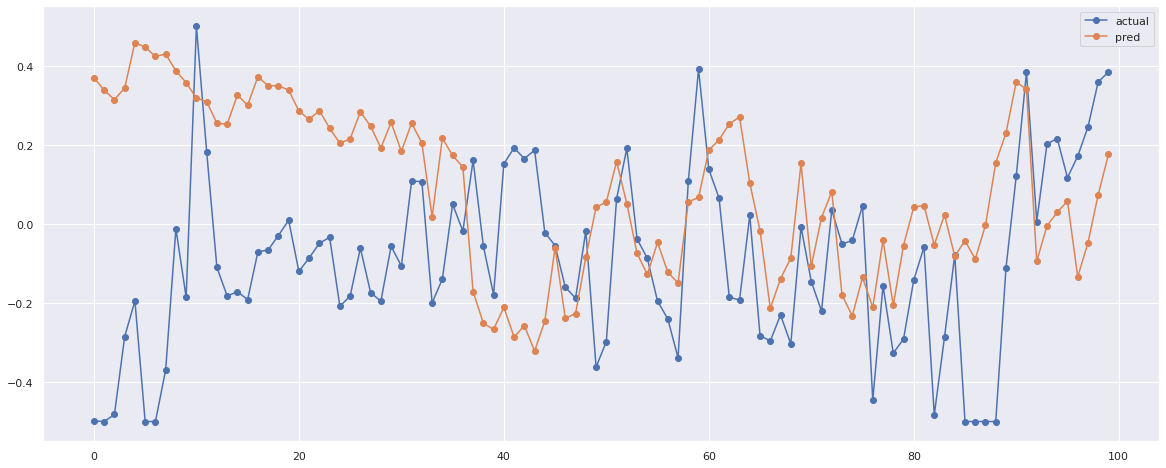

In [242]:
df_test_preds.plot(figsize=(20, 8), marker='o')

In [243]:
test_pct_err = (df_test_preds['actual'] - df_test_preds['pred']) / df_test_preds['actual']

(-10.0, 10.0)

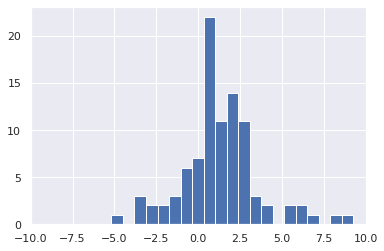

In [245]:
test_pct_err.hist(bins=100)
plt.xlim(-10, 10)

In [246]:
test_pct_err.abs().mean()

3.1692471504211426

In [247]:
test_pct_err.abs().median()

1.7628244161605835

In [248]:
# bininary classification test accuracy 
((df_test_preds['actual'] * df_test_preds['pred']) > 0 ).sum() / len(df_test_preds['actual'])

0.48

In [253]:
def train_and_test(df_feats, codes, train_dt='2020-01-01'):
    
    train_accs = []
    test_accs = []

    for code in pb(codes):

        sr_target = return_days(df_dict[str(code)].Close, days=3).rename('ret3d')
        sr_target.dropna(inplace=True)
        df_merged = pd.merge(df_feats, sr_target, left_index=True, right_index=True).dropna()
        df_feats = df_merged[df_feats.columns]
        sr_target = df_merged['ret3d']
        df_train_feats = df_feats[df_feats.index <= train_dt]
        df_test_feats = df_feats[df_feats.index > train_dt]
        sr_train_target = sr_target[sr_target.index <= train_dt]
        sr_test_target = sr_target[sr_target.index > train_dt]

        xs_train, ys_train = create_y_feat_train_dataset(df_train_feats, sr_train_target, 30)

        model = BILSTM(
            input_dim=len(df_feats.columns),
            hidden_dim=32,
            num_layers=2,
            output_dim=1
        )

        mse_loss = nn.MSELoss()
        optim = torch.optim.Adam(
            params=model.parameters(),
            lr=0.005
        )

        loss_history = []

        for n in pb(range(EPOCHS)):
            losses = []
            for t in range(xs_train.size(0) // BATCH_SIZE):
                x = xs_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]
                y = ys_train[t*BATCH_SIZE:(t+1)*BATCH_SIZE, :, :]

                out = model(x)
                loss = mse_loss(out, y)

                optim.zero_grad()
                loss.backward()
                optim.step()

                losses.append(loss.item())

            loss_history.append(sum(losses) / len(losses))

        model.eval()

        preds = model(xs_train)[:, -1, :].detach().numpy().flatten()
        df_train_preds = pd.DataFrame({
            'actual': ys_train[:, -1, :].detach().numpy().flatten(),
            'pred': preds
        })
        train_accs.append(((df_train_preds['actual'] * df_train_preds['pred']) > 0 ).sum() / len(df_train_preds['actual']))

        xs_test, ys_test = create_y_feat_train_dataset(df_test_feats, sr_test_target, 30)
        preds = model(xs_test)[:, -1, :].detach().numpy().flatten()

        df_test_preds = pd.DataFrame({
            'actual': ys_test[:, -1, :].detach().numpy().flatten(),
            'pred': preds
        })
        test_accs.append(((df_test_preds['actual'] * df_test_preds['pred']) > 0 ).sum() / len(df_test_preds['actual']))

    return pd.DataFrame({
        'code': codes,
        'train_cls_accs': train_accs,
        'test_cls_accs': test_accs
    })

In [254]:
df_accs = train_and_test(df_feats, list(df_dict.keys()))

In [255]:
df_accs

,code,train_cls_accs,test_cls_accs
0,6769,0.901961,0.520000
1,2317,0.934641,0.585859
2,2914,0.931373,0.545455
3,7434,0.895425,0.636364
4,7953,0.957516,0.464646
5,5486,0.957516,0.454545
6,9042,0.954248,0.434343
7,3202,0.918301,0.494949
8,2910,0.911765,0.666667
9,3401,0.947712,0.424242


In [259]:
df_accs.sort_values(by='test_cls_accs', ascending=False)

,code,train_cls_accs,test_cls_accs
8,2910,0.911765,0.666667
3,7434,0.895425,0.636364
13,3245,0.938144,0.600000
12,9701,0.965636,0.588889
1,2317,0.934641,0.585859
10,9104,0.950980,0.555556
18,3395,0.972318,0.555556
2,2914,0.931373,0.545455
11,1380,0.934641,0.545455
19,3632,0.948097,0.544444


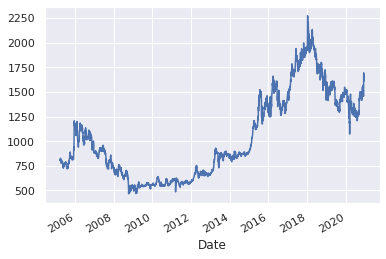

In [261]:
df_dict['2910'].Close.plot()

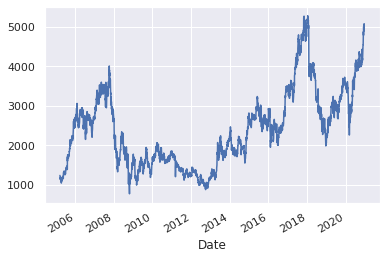

In [262]:
df_dict['6622'].Close.plot()